In [ ]:
# # importing the dataset
from google.colab import files
files.upload()

Saving final_data.json to final_data.json


{'final_data.json': b'{"Intents": [{"tag": "tag#1", "patterns": ["\\r\\n                                        What is COVID-19?\\r\\n                                    ", "(\'what does covid-19 mean?\', 91)", "(\'what exactly is covid-19?\', 26)", "(\'what do you think covid-19 means?\', 24)", "(\'what does covid-19 mean?\', 17)", "(\\"what does covid-19 mean?\'\\", 16)"], "responses": ["\\nCOVID-19 is the disease caused by a new coronavirus called SARS-CoV-2. \\u00a0WHO first learned of this new virus on 31 December 2019, following a report of a cluster of cases of \\u2018viral pneumonia\\u2019 in Wuhan, People\\u2019s Republic of China."], "context": []}, {"tag": "tag#2", "patterns": ["\\r\\n                                        What are the symptoms of COVID-19?\\r\\n                                    ", "(\'what are signs and symptoms of covid-19?\', 94)", "(\'tell me the symptoms of covid-19?\', 93)", "(\'what are symptoms of covid-19?\', 92)", "(\'can you list the symptoms 

# **Data Preprocessing**

In [ ]:
# reading the dataset in json format
import json
with open('final_data.json') as file:
    intents = json.load(file)

In [ ]:
# Imprting essential Libraiers
import nltk
import numpy as np
import json
from nltk.stem import WordNetLemmatizer
import random
import re
nltk.download('punkt')

# importing the stopwords and stroring it
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# importing the stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# creating list for tags
tags = []
# creating list for training inputs
x_train = []
# creating list to strore traing data
x_y = []

for intent in intents['Intents']:

  #inserting the tags in tag list
  if intent['tag'] not in tags:
    tags.append(intent['tag'])

  for pattern in intent['patterns']:
    # tokenizing the each word in pattern
    token = nltk.word_tokenize(str(pattern))
    
    # creating list to store the words in single pattern
    pattern_words = []
    for word in token:
      # removing the stopwords in pattern
      if word not in stopwords:
        # removing any abnormal words or letters using regular expression
        word = re.sub('[^a-zA-Z\s\w]','',word)
        # stemming the words to take it into the base form
        new_words = stemmer.stem(word.lower())
        pattern_words.append(new_words)
    # store the takenize pattern in x_train
    x_train.append(pattern_words)
  
    x_y.append((token,intent['tag']))
    
# getting the length of training data
len(x_y)

6849

In [ ]:
# joining the tokenize pattern in x_train to vectorize it
x_final = []
for sent in x_train:
  x_final.append(' '.join(sent))

len(x_final)

6849

In [ ]:
# using TFIDF vectorisor
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer().fit(x_final)
print(vect)

x_train_vect = vect.transform(x_final).toarray()
print(len(x_train_vect))

TfidfVectorizer()
6849


In [ ]:
# creating list to store the output tags
training_data = []

for pat_word in x_y:
  input_bag = []
  words_in_pattern = pat_word[0]

  # store 1 for correct tag otherwise put 0
  output_bag = [0]*len(tags)
  output_bag[tags.index(pat_word[1])] = 1
  
  training_data.append(output_bag)

In [ ]:
# Store the traing data into variables
x_train = x_train_vect
y_train = list(training_data)




# **Model Building**




In [ ]:
# import libraries to fit the model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(y_train[0]), activation='softmax'))

sgd = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(np.array(x_train), np.array(y_train), epochs=500, batch_size=10, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/500
685/685 [==============================] - 4s 3ms/step - loss: 6.3452 - accuracy: 0.0025
Epoch 2/500
685/685 [==============================] - 2s 3ms/step - loss: 6.3356 - accuracy: 0.0047
Epoch 3/500
685/685 [==============================] - 2s 3ms/step - loss: 6.3244 - accuracy: 0.0035
Epoch 4/500
685/685 [==============================] - 2s 3ms/step - loss: 6.3105 - accuracy: 0.0042
Epoch 5/500
685/685 [==============================] - 2s 3ms/step - loss: 6.2951 - accuracy: 0.0053
Epoch 6/500
685/685 [==============================] - 2s 3ms/step - loss: 6.2751 - accuracy: 0.0086
Epoch 7/500
685/685 [==============================] - 2s 3ms/step - loss: 6.2528 - accuracy: 0.0098
Epoch 8/500
685/685 [==============================] - 2s 3ms/step - loss: 6.2265 - accuracy: 0.0126
Epoch 9/500
685/685 [==============================] - 2s 3ms/step - loss: 6.1868 - accuracy: 0.0203
Epoch 10/500
685/685 [==============================] - 2s 3ms/step - loss: 6.1280 - accura

# **Model Testing**

In [ ]:
# Getting the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               225920    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 571)               37115     
                                                                 
Total params: 271,291
Trainable params: 271,291
Non-trainable params: 0
_________________________________________________________________


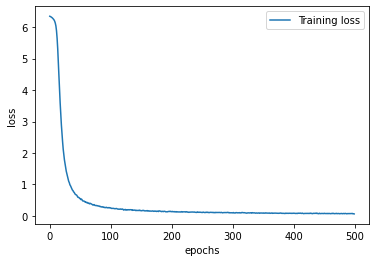

In [ ]:
# Visulizing the loss functions
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label="Training loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

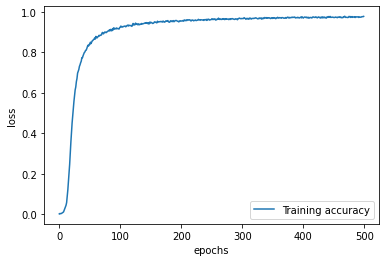

In [ ]:
# Visualizing the accuracy of model
plt.plot(hist.history['accuracy'],label="Training accuracy")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# save the model for future use
model.save("Ch_model.h5",model)

In [ ]:
# rxtract the resorses for furture use
import pickle
pickle.dump(vect,open("vectoriser.pkl","wb"))
pickle.dump(tags,open("tags.pkl","wb"))
pickle.dump(x_final,open("x_final.pkl","wb"))